<a href="https://colab.research.google.com/github/zevy613/sales-predictions-Data-cleaning/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
#lets first import the libraries we might need.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

filename = "/content/drive/MyDrive/Colab Notebooks/CodingDojo/04Explanatory-Viz/sales_predictions.csv"
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [57]:
df.duplicated().sum()
#no duplicate data has been found

0

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [59]:
# remove Unnecessary columns
# The Item_Identifier and Outlet_Establishment_Year columns seem irrelevant. Lets drop them.
df.drop(columns=['Item_Identifier', 'Outlet_Establishment_Year'], inplace=True)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052


In [60]:
# lets check the types of our columns
df.nunique()

Item_Weight              415
Item_Fat_Content           5
Item_Visibility         7880
Item_Type                 16
Item_MRP                5938
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
Item_Outlet_Sales       3493
dtype: int64

In [61]:
df['Item_Fat_Content'].value_counts()
# from here we clearly see mistakes in the spelling of low fat and regular fat. lets fix these.

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [62]:
df['Item_Fat_Content'].replace('LF','Low Fat', inplace=True)
df['Item_Fat_Content'].replace('low fat','Low Fat', inplace=True)
df['Item_Fat_Content'].replace('reg','Regular', inplace=True)
df['Item_Fat_Content'].value_counts()
# now we have just the two categories we want.

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [63]:
#lets now check for null values
df.isna().sum()

Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
dtype: int64

In [64]:
df['Item_Weight'].value_counts()
# Looking at the data I think that for the Item_Weight column we should impute that average weight 
# for the missing values.

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [65]:
avg_weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(avg_weight, inplace=True)
df.isna().sum()

Item_Weight                0
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
dtype: int64

In [66]:
df['Outlet_Size'].value_counts()
# In the case of the Outlet_Size column, I think we should fill the missing values with the most common 
# store size, in this case Medium

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [67]:
df['Outlet_Size'].fillna('Medium', inplace=True)
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [68]:
#Now our data has NO Missing/NULL values
df.isna().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Identifier     8523 non-null   object 
 6   Outlet_Size           8523 non-null   object 
 7   Outlet_Location_Type  8523 non-null   object 
 8   Outlet_Type           8523 non-null   object 
 9   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), object(6)
memory usage: 666.0+ KB


In [70]:
# lets caluculate the minimum maximum and average for our numeric columns 
display("The minimum weight is " + str(df['Item_Weight'].min().round(2)))
display("The maximum weight is " + str(df['Item_Weight'].max().round(2)))
display("The average weight is " + str(df['Item_Weight'].mean().round(2)))

'The minimum weight is 4.56'

'The maximum weight is 21.35'

'The average weight is 12.86'

In [71]:
display("The minimum Retail Price is " + str(df['Item_MRP'].min().round(2)))
display("The maximum Retail Price is " + str(df['Item_MRP'].max().round(2)))
display("The average Retail Price is " + str(df['Item_MRP'].mean().round(2)))

'The minimum Retail Price is 31.29'

'The maximum Retail Price is 266.89'

'The average Retail Price is 140.99'

In [72]:
display("The minimum Sales is " + str(df['Item_Outlet_Sales'].min().round(2)))
display("The maximum Sales is " + str(df['Item_Outlet_Sales'].max().round(2)))
display("The average Sales is " + str(df['Item_Outlet_Sales'].mean().round(2)))

'The minimum Sales is 33.29'

'The maximum Sales is 13086.96'

'The average Sales is 2181.29'

In [73]:
#Alternatively, we can also show more nuanced stats.
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.226124,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,9.310000,0.026989,93.826500,834.247400
50%,12.857645,0.053931,143.012800,1794.331000
75%,16.000000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


We are now ready for visualization and analysis!

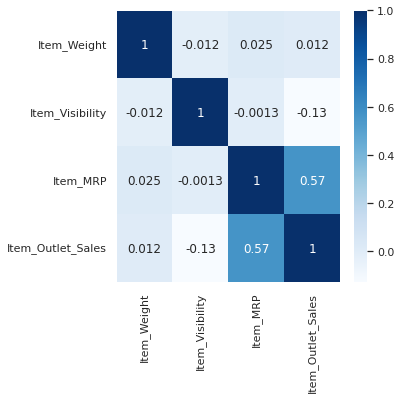

In [74]:
#Lets check to see if any of our columns correlate.
corr = df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, cmap='Blues', annot=True);

In [75]:
#Because the graph is mirrored along the diaganol, we only need to check either the top or bottom half of our heatmap.
#We can see that the Item_MRP and the Item_Outlet_Sales have a medium correlation level and that Item_Outlet_Sales 
#and Item_Weight have almost no correlation at all.

In [76]:
df.nunique()

Item_Weight              416
Item_Fat_Content           2
Item_Visibility         7880
Item_Type                 16
Item_MRP                5938
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
Item_Outlet_Sales       3493
dtype: int64

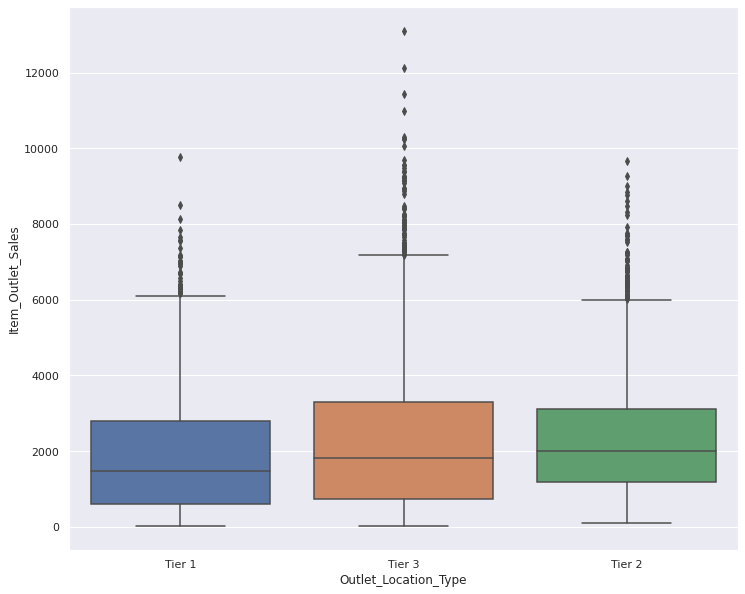

In [77]:
# From the above table, lets use a boxplot to see where most of our data lies and if there are any outliers relating to Outlet_Location_Type.
# Lets use seaborn to make a boxplot to compare the Item_Outlet_Sales and the Outlet_Location_Type.
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df)

# Lets increase the size of the plot.
sns.set(rc = {'figure.figsize':(12,10)})

In [78]:
# We can see from the picture above that tiers 1 and 3 have ruffly the same distribution of the first 25% of their data.
# Tier 3 has the most data in the last 50% of its data.
# All tiers have plenty of outliers.

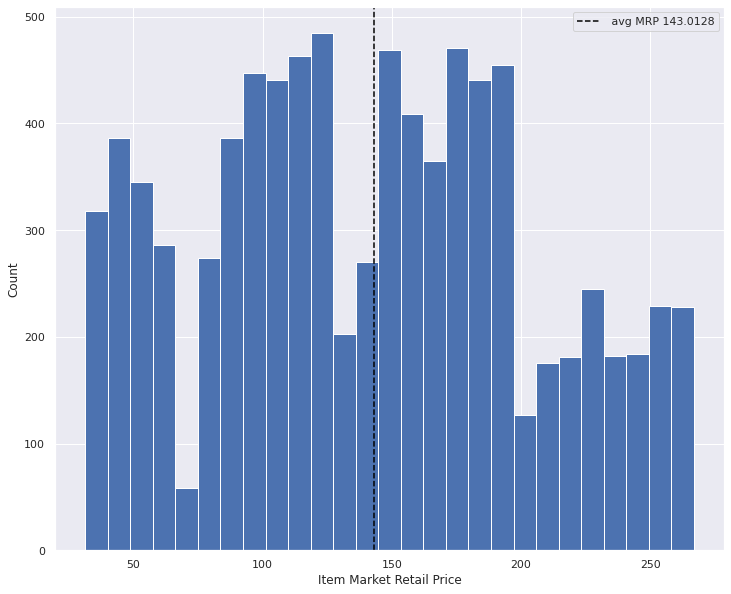

In [79]:
# Lets make a histogram about the Items Market Retail Price
df['Item_MRP'].hist(bins='auto');
plt.xlabel('Item Market Retail Price')
plt.ylabel('Count')
md = df['Item_MRP'].median()
plt.axvline(md, color='black', linestyle='--', label=f" avg MRP {md}")
plt.legend()

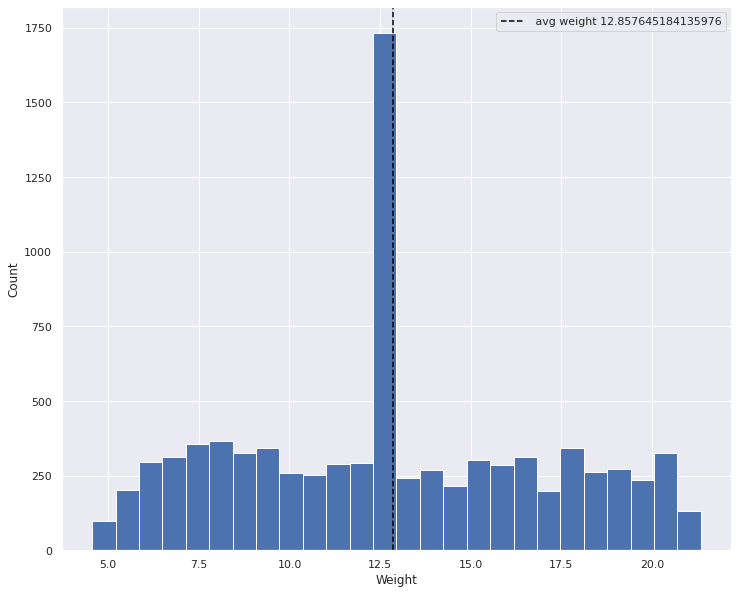

In [80]:
# We can see from the following histogram that the most common weight of an item is around 12.5
df['Item_Weight'].hist(bins='auto')
plt.xlabel('Weight')
plt.ylabel('Count')
md = df['Item_Weight'].median()
plt.axvline(md, color='black', linestyle='--', label=f" avg weight {md}")
plt.legend()

Explanatory Visualizations and Multivariate Analysis

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

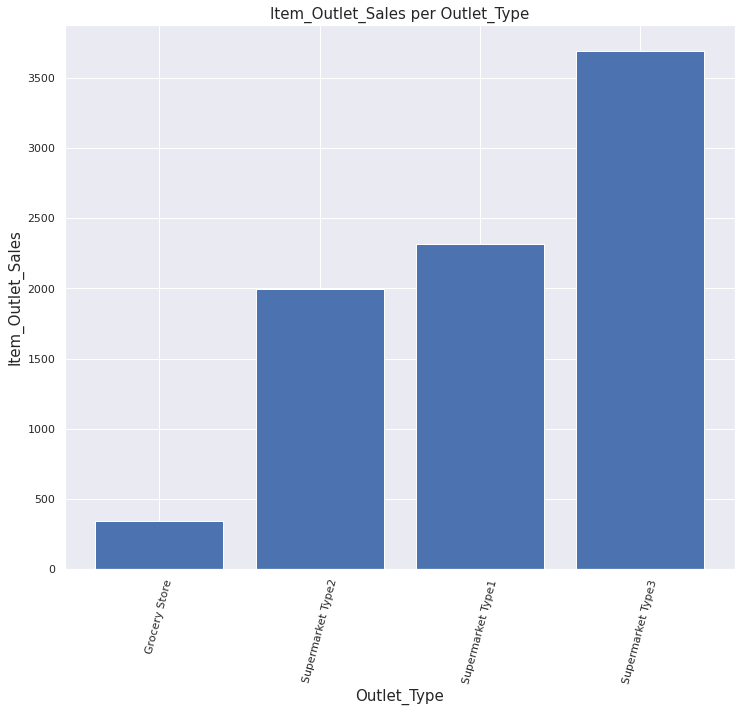

In [81]:
ifc = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values(); 
plt.bar(ifc.index, ifc.values)
plt.xlabel("Outlet_Type", fontsize=15)
plt.ylabel("Item_Outlet_Sales", fontsize=15)
plt.title("Item_Outlet_Sales per Outlet_Type", fontsize=15)
plt.xticks(rotation=75)

Text(0.5, 1.0, 'Item_Outlet_Sales per Outlet_Type')

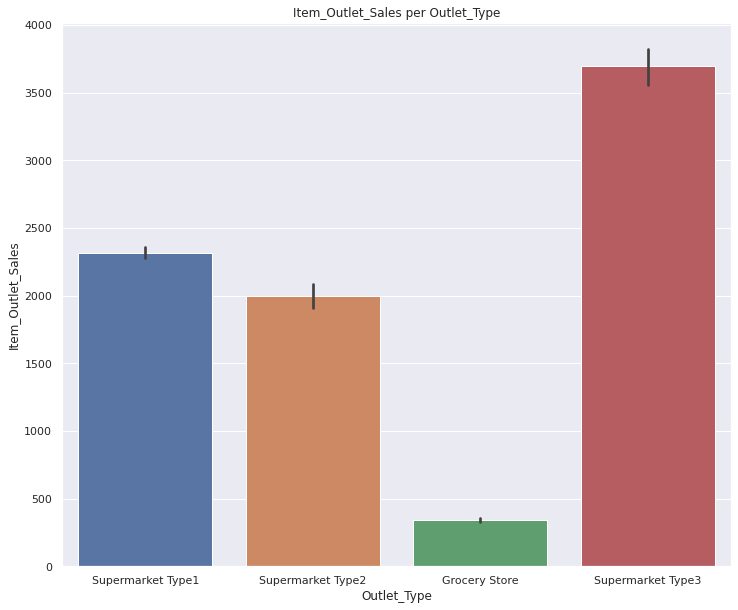

In [82]:
sns.barplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales')
plt.title("Item_Outlet_Sales per Outlet_Type")

In [83]:
#From the above two graphs, we can see that Grocery Stores have the lowest Item Outlet Sales. 

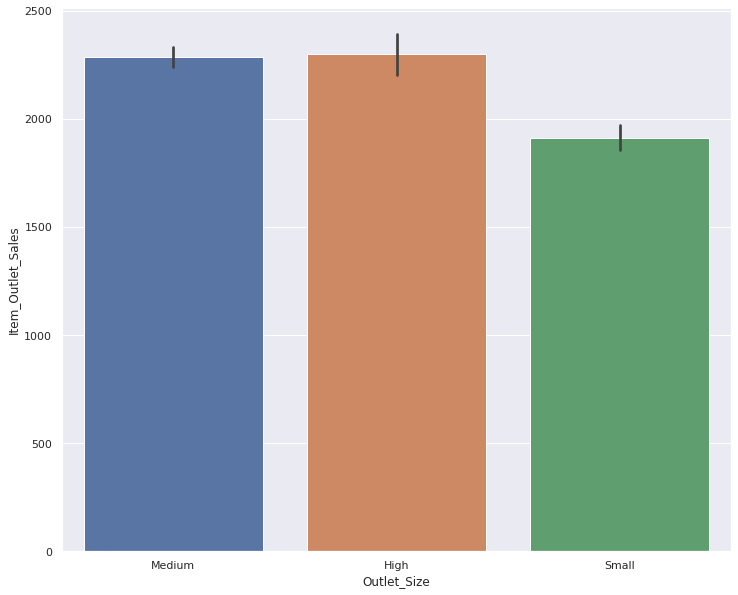

In [84]:
sns.barplot(data=df, x='Outlet_Size', y='Item_Outlet_Sales')
#We can see that the Outlet Size impacts the Outlet Sales slightly showing that 'small' produces less sales then 'medium' and 'high'.

Text(0.5, 1.0, 'Item Outlet Sales per Item Type')

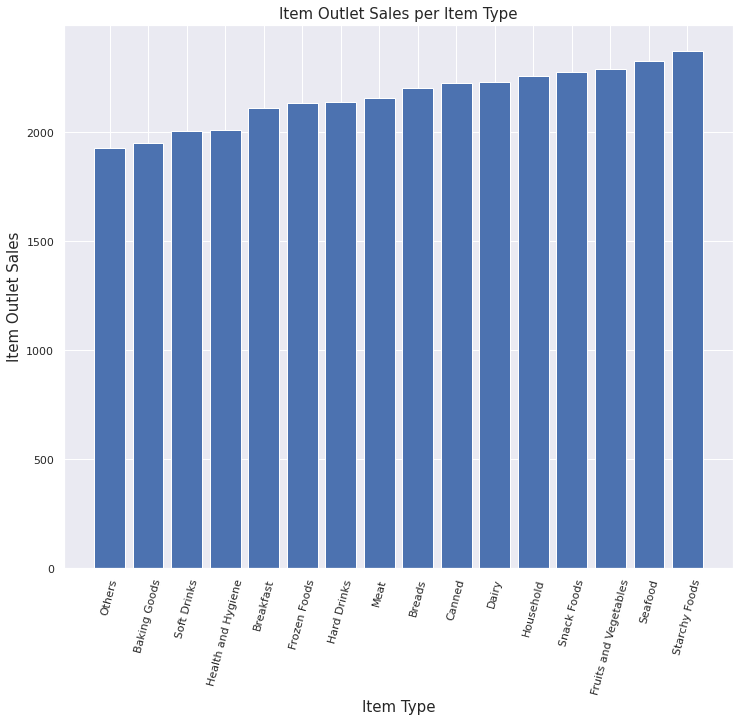

In [85]:
it = df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values()
plt.bar(it.index, it.values)
plt.xticks(rotation=75)
plt.xlabel("Item Type", fontsize=15)
plt.ylabel("Item Outlet Sales", fontsize=15)
plt.title("Item Outlet Sales per Item Type", fontsize=15)
#From the bar graph below, we can see that starchy foods and seafood have the highest Item Outlet Sales.

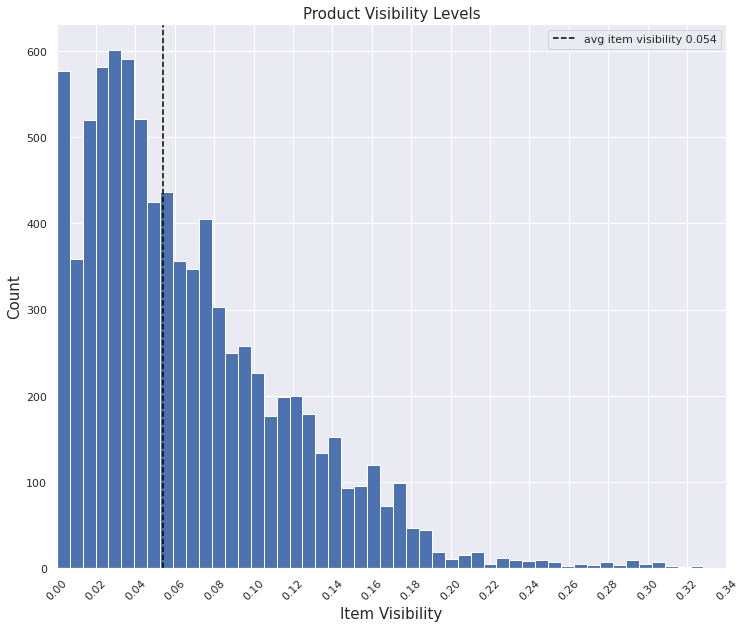

In [86]:
df['Item_Visibility'].hist(bins='auto')
plt.xlabel("Item Visibility", fontsize=15)
plt.xticks(np.arange(0, .4, .02), rotation=45)
plt.ylabel("Count", fontsize=15)
plt.title("Product Visibility Levels", fontsize=15)
md = df['Item_Visibility'].median()
plt.axvline(md, color='black', linestyle ='--', label=f'avg item visibility {md.round(3)}')
plt.xlim(left=0,right=.34)
plt.legend()

Final Analysis

Sell more starchy and sea foods.

Open less grocery stores as they have the lowest sales.

#@title
Other Graphs

In [87]:
# plot_df = df.groupby('Outlet_Type').mean()
# plot_df.plot(y=['Item_MRP'], subplots = False, marker='o', figsize = (25,5));
# plt.title("Item MRP")

In [88]:
# plot_df = df.groupby('Outlet_Identifier').mean()
# plot_df.plot(y=['Item_MRP', 'Item_Outlet_Sales'], subplots = True, marker='o', figsize = (45,10));

In [89]:
# plot_df = df.groupby('Item_Type').mean()
# plot_df.plot(y=['Item_MRP', 'Item_Outlet_Sales'], subplots = True, marker='o', figsize = (25,10));

In [90]:
# sns.scatterplot(data=df, x = 'Item_MRP', y = 'Item_Outlet_Sales', hue = 'Outlet_Type');

In [91]:
# df_sorted = df.sort_values(by='Item_Outlet_Sales', ascending=True)
# sns.barplot(data=df_sorted, x='Item_Type', y='Item_Outlet_Sales')
# plt.title("Item Outlet Sales")
# plt.xticks(rotation=90)

In [92]:
# ifc = df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().sort_values()
# it = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().sort_values()
# plt.bar(ifc.index, ifc.values)
# plt.bar(it.index, it.values)
# plt.xticks(rotation=75)

In [93]:
# sns.pairplot(df.loc[:])